# 1. 환경설정

In [2]:
from matplotlib import pyplot as plt
from datetime import datetime as dt

import os
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import random
import warnings


warnings.filterwarnings('ignore')
# Pandas 데이터 프레임에서 float을 소수점 2자리 까지 출력해 준다.
pd.set_option('display.float_format', lambda x: '%.4f' % x)
# Pandas 데이터 프레임에서 column을 다 출력하도록 설정한다.
pd.set_option('display.max_columns', None)
# Pandas 데이터 프레임에서 row를 다 출력하도록 설정한다.
#pd.set_option('display.max_rows', None)


random.seed(3)

In [3]:
d1 = pd.read_csv('dataset/2020to2022.csv', encoding = 'cp949')
d2 = pd.read_csv('dataset/2023result_nothisweek.csv', encoding = 'cp949')

In [439]:
d1 = pd.read_csv('dataset/2020to2022.csv', encoding = 'cp949')
d2 = pd.read_csv('dataset/2023result.csv', encoding = 'cp949')

# 2. 데이터 전처리

### 1) 데이터 병합

In [4]:
data = pd.concat([d1, d2], axis = 0)  # idx = ~22235까지 ~2022 // idx 22236~부터 2023
data = data.reset_index(drop=True)
# 날짜화
data['B_Date'] = pd.to_datetime(data['B_Date'], format = '%Y-%m-%d')

In [5]:
data.tail(13)

,B_Date,B_Place,B_Crowd,B_Ref,B_TeamScore,B_Team,B_OppTeam,B_isHome,B_HomeWin,B_AwayWin,B_Coach,C_Backnum,C_Name,C_Pos,C_Time,C_Rate,A_Score,A_Assist,A_Shoot,A_VShoot,A_BShoot,A_nonVShoot,A_PAShoot,A_nonPAShoot,A_Off,A_Free,A_Corner,A_Throw,A_DribSucNum,A_DribSucPer,P_PassSucNum,P_PassSucPer,P_Key,P_AASucNum,P_AASucPer,P_MASucNum,P_MASucPer,P_DASucNum,P_DASucPer,P_LongSucNum,P_LongSucPer,P_MidSucNum,P_MidSucPer,P_ShortSucNum,P_ShortSucPer,P_ForSucNum,P_ForSucPer,P_SidSucNum,P_SidSucPer,P_BackSucNum,P_BackSucPer,P_CrossSucNum,P_CrossSucPer,P_PR,D_GroundSucNum,D_GroundSucPer,D_AirSucNum,D_AirSucPer,D_TackSucNum,D_TackSucPer,D_Clear,D_Inter,D_Shut,D_Gain,D_Block,D_Miss,D_Foul,D_GainFoul,D_Yellow,D_Red,G_Loss,G_Catch,G_Punch,G_KickSucNum,G_KickSucPer,G_AirSucNum,G_AirSucPer
28268,2023-08-27,광주 전용,"5,014",정동식,0,수원,광주,0,1,0,김병수,7,고승범,MF,76,5.8000,0,0,0,0,0,0,0,0,0,0,0,0,1,100.0000,28,82,0,5,71.4000,0,0,4,100.0000,5,71.4000,10,90.9000,13,81.2000,6,54.6000,16,100.0000,6,85.7000,0,0.0000,0,0,0.0000,2,66.7000,0,0.0000,2,2,NaN,3,2,0,0,1,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28269,2023-08-27,광주 전용,"5,014",정동식,0,수원,광주,0,1,0,김병수,81,카즈키,MF,101,5.8000,0,0,1,0,1,0,0,1,0,3,3,1,0,0.0000,39,85,0,5,100.0000,0,0,7,77.8000,6,85.7000,5,71.4000,28,87.5000,17,73.9000,12,92.3000,10,100.0000,0,0.0000,0,0,0.0000,0,0.0000,1,50.0000,1,2,NaN,0,3,0,0,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28270,2023-08-27,광주 전용,"5,014",정동식,0,수원,광주,0,1,0,김병수,32,서동한,MF,25,5.8000,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,4,80,0,1,50.0000,0,0,0,0.0000,0,0.0000,1,100.0000,3,75.0000,3,75.0000,1,100.0000,0,0.0000,1,100.0000,0,1,100.0000,0,0.0000,2,66.7000,0,0,NaN,1,1,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28271,2023-08-27,광주 전용,"5,014",정동식,0,수원,광주,0,1,0,김병수,37,김주찬,FW,101,6.0000,0,0,0,0,0,0,0,0,0,0,0,0,1,50.0000,10,77,0,4,80.0000,0,0,2,66.7000,1,100.0000,2,66.7000,7,77.8000,2,100.0000,3,75.0000,5,71.4000,0,0.0000,2,0,0.0000,1,16.7000,1,100.0000,0,0,NaN,0,2,0,1,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28272,2023-08-27,광주 전용,"5,014",정동식,0,수원,광주,0,1,0,김병수,36,명준재,FW,58,5.8000,0,0,1,0,0,1,0,1,0,0,0,0,0,0.0000,12,75,1,3,75.0000,0,0,1,50.0000,0,0.0000,4,100.0000,8,66.7000,2,66.7000,2,66.7000,8,80.0000,0,0.0000,0,0,0.0000,2,50.0000,0,0.0000,0,1,NaN,0,1,0,1,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28273,2023-08-27,광주 전용,"5,014",정동식,0,수원,광주,0,1,0,김병수,17,김경중,FW,49,5.8000,0,0,1,0,1,0,0,1,0,0,0,2,1,100.0000,11,73,0,4,100.0000,0,0,4,66.7000,0,0.0000,8,100.0000,3,60.0000,4,50.0000,1,100.0000,6,100.0000,0,0.0000,3,0,0.0000,1,100.0000,0,0.0000,2,3,NaN,1,4,0,1,2,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28274,2023-08-27,광주 전용,"5,014",정동식,0,수원,광주,0,1,0,김병수,4,불투이스,대기,43,6.0000,0,0,1,0,0,1,1,0,0,0,0,0,1,100.0000,13,76,1,3,75.0000,0,0,2,100.0000,2,66.7000,4,66.7000,7,87.5000,8,66.7000,5,100.0000,0,0.0000,0,0.0000,1,0,0.0000,2,50.0000,1,100.0000,6,1,NaN,0,3,0,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28275,2023-08-27,광주 전용,"5,014",정동식,0,수원,광주,0,1,0,김병수,11,김태환,대기,52,5.8000,0,0,1,0,1,0,1,0,0,0,0,6,0,0.0000,16,89,0,6,100.0000,0,0,3,75.0000,0,0.0000,6,100.0000,10,90.9000,3,60.0000,4,100.0000,9,100.0000,1,100.0000,1,0,0.0000,1,33.3000,1,50.0000,4,0,NaN,2,5,0,2,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28276,2023-08-27,광주 전용,"5,014",정동식,0,수원,광주,0,1,0,김병수,88,유제호,대기,25,5.8000,0,0,1,0,0,1,0,1,0,0,0,1,1,100.0000,6,100,0,3,100.0000,0,0,0,0.0000,0,0.0000,1,100.0000,5,100.0000,1,100.0000,4,100.0000,1,100.0000,0,0.0000,0,0,0.0000,0,0.0000,0,0.0000,0,1,NaN,1,2,2,0,3,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28277,2023-08-27,광주 전용,"5,014",정동식,0,수원,광주,0,1,0,김병수,18,아코스티,대기,76,6.0000,0,0,1,1,0,0,0,1,0,0,0,0,1,100.0000,9,64,1,3,60.0000,0,0,1,100.0000,1,100.0000,2,100.0000,6,54.6000,3,60.0000,1,33.3000,5,83.3000,0,0.0000,1,0,0.0000,3,75.0000,1,100.0000,0,2,NaN,0,1,1,1,1,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2) 데이터 순서 보존

In [6]:
#### 데이터 순서 빠그러지지 않게 해주는 변수
data['Order'] = np.ones((len(data),1))
order = 1
idx = 1
while True:
    try:
        t1 = data['B_Team'][idx]
        t2 = data['B_Team'][idx-1]
        t3 = data['B_Date'][idx]
        t4 = data['B_Date'][idx-1]
        if t1 == t2 and t3==t4:
            data['Order'][idx] = order
        else:
            order += 1
            data['Order'][idx] = order
        idx += 1
    except:
        print('끝')
        break

끝


### 3) 사전 논의 컬럼 제거

In [7]:
'''
변수 제거사항
## B 계열
'B_Place', 'B_Crowd'
## C 계열(Name은 Groupby 시 구분 용으로만 쓰고 지워야함)
'C_Name', 'C_Backnum', 'C_Pos', 'C_Time'
## A 계열

## G 계열

'''
data.drop(['B_Place', 'B_Crowd', 'C_Name',
           'C_Backnum', 'C_Pos', 'C_Time'], axis = 1, inplace = True) 
# 선행적 예측에서는 B_HomeWin, B_AwayWin, C_Rate, A_Score, A_Assist, G_Loss 활용

### 4) 백분위 컬럼 분모 복원

In [8]:
PerCol = ['A_DribSucPer', 'P_PassSucPer', 'P_AASucPer', 'P_MASucPer', 'P_DASucPer', 'P_LongSucPer',
         'P_MidSucPer', 'P_ShortSucPer', 'P_ForSucPer', 'P_SidSucPer', 'P_BackSucPer', 'P_CrossSucPer',
         'D_GroundSucPer', 'D_AirSucPer', 'D_TackSucPer', 
         'G_KickSucPer', 'G_AirSucPer']
for col in PerCol:
    data[col[:-6]+'Trial'] = np.ones((len(data), 1))
for col in enumerate(data.columns):
    print(col)
    
PerNum = [23,25,28,30,32,34,36,38,40,42,44,46,49,51,53,68,70]
print(len(PerCol))
print(len(PerNum))

for n in PerNum:
    nlist = list()
    for i in range(len(data)):
        try:
            nlist.append(round((100*data[data.columns[n-1]].loc[i].values[0]/a)))
        except:
            nlist.append(0)
    data[data.columns[n][:-6]+'Trial'] = nlist
data.drop(PerCol, axis = 1, inplace = True)
data = data.fillna(0)

(0, 'B_Date')
(1, 'B_Ref')
(2, 'B_TeamScore')
(3, 'B_Team')
(4, 'B_OppTeam')
(5, 'B_isHome')
(6, 'B_HomeWin')
(7, 'B_AwayWin')
(8, 'B_Coach')
(9, 'C_Rate')
(10, 'A_Score')
(11, 'A_Assist')
(12, 'A_Shoot')
(13, 'A_VShoot')
(14, 'A_BShoot')
(15, 'A_nonVShoot')
(16, 'A_PAShoot')
(17, 'A_nonPAShoot')
(18, 'A_Off')
(19, 'A_Free')
(20, 'A_Corner')
(21, 'A_Throw')
(22, 'A_DribSucNum')
(23, 'A_DribSucPer')
(24, 'P_PassSucNum')
(25, 'P_PassSucPer')
(26, 'P_Key')
(27, 'P_AASucNum')
(28, 'P_AASucPer')
(29, 'P_MASucNum')
(30, 'P_MASucPer')
(31, 'P_DASucNum')
(32, 'P_DASucPer')
(33, 'P_LongSucNum')
(34, 'P_LongSucPer')
(35, 'P_MidSucNum')
(36, 'P_MidSucPer')
(37, 'P_ShortSucNum')
(38, 'P_ShortSucPer')
(39, 'P_ForSucNum')
(40, 'P_ForSucPer')
(41, 'P_SidSucNum')
(42, 'P_SidSucPer')
(43, 'P_BackSucNum')
(44, 'P_BackSucPer')
(45, 'P_CrossSucNum')
(46, 'P_CrossSucPer')
(47, 'P_PR')
(48, 'D_GroundSucNum')
(49, 'D_GroundSucPer')
(50, 'D_AirSucNum')
(51, 'D_AirSucPer')
(52, 'D_TackSucNum')
(53, 'D_TackSucP

### 5) 팀 단위 데이터 생성

In [9]:
df = data.groupby(['B_Date', 'B_Team', 'B_OppTeam']).agg({
    'B_Ref':'unique', 'B_TeamScore':'unique', 'B_isHome':'unique',
    'B_HomeWin':'unique', 'B_AwayWin':'unique', 'B_Coach':'unique',
    'C_Rate':'mean','A_Score':'sum', 'A_Assist':'sum',
    'A_Shoot':'sum', 'A_VShoot':'sum', 'A_BShoot':'sum', 
    'A_nonVShoot':'sum','A_PAShoot':'sum', 'A_nonPAShoot':'sum', 'A_Off':'sum', 
    'A_Free':'sum', 'A_Corner':'sum', 'A_Throw':'sum','A_DribSucNum':'sum', 'A_DribTrial':'sum',
    'P_PassTrial':'sum', 'P_PassSucNum':'sum', 'P_Key':'sum', 'P_AASucNum':'sum', 'P_AATrial':'sum',
    'P_MASucNum':'sum', 'P_MATrial':'sum', 'P_DASucNum':'sum', 'P_DATrial':'sum' ,
    'P_LongSucNum':'sum', 'P_LongTrial':'sum', 'P_MidSucNum':'sum', 'P_MidTrial':'sum', 
    'P_ShortSucNum':'sum', 'P_ShortTrial':'sum','P_ForSucNum':'sum', 'P_ForTrial':'sum', 
    'P_SidSucNum':'sum', 'P_SidTrial':'sum', 'P_BackSucNum':'sum', 'P_BackTrial':'sum', 
    'P_CrossSucNum':'sum',  'P_CrossTrial':'sum','P_PR':'sum', 
    'D_GroundSucNum':'sum', 'D_GroundTrial':'sum', 'D_AirSucNum':'sum', 'D_AirTrial':'sum', 
    'D_TackSucNum':'sum', 'D_TackTrial':'sum', 'D_Clear':'sum', 'D_Inter':'sum',
    'D_Shut':'sum', 'D_Gain':'sum', 'D_Block':'sum', 
    'D_Miss':'sum', 'D_Foul':'sum', 'D_GainFoul':'sum','D_Yellow':'sum', 'D_Red':'sum', 
    'G_Loss':'sum', 'G_Catch':'sum', 'G_Punch':'sum', 'G_KickSucNum':'sum', 'G_KickTrial':'sum', 
    'G_AirSucNum':'sum', 'G_AirTrial':'sum',
    'Order':'mean'
}).reset_index()

In [10]:
Collist = ['B_Ref', 'B_TeamScore', 'B_isHome', 'B_HomeWin', 'B_AwayWin', 'B_Coach']
for col in Collist:
    for i in range(len(df)):
        df[col].loc[i] = str(df[col].loc[i])[1:-1]
Collist = ['B_Ref', 'B_Coach']
for col in Collist:
    for i in range(len(df)):
        df[col].loc[i] = str(df[col].loc[i])[1:-1]
data = df

### 6) 데이터 순서 조정

In [11]:
data = data.sort_values(by='Order', axis = 0, ascending = True)
data = data.reset_index(drop = True)
#data.drop('Order', axis = 1, inplace = True)
count = 0
idx = list()
for i in range(len(data)):
    ht = data.iloc[i,1]
    at = data.iloc[i,2]
    if ht==at:
        count+=1
        idx.append(i)
print(count)
print(idx)

12
[3, 14, 33, 109, 312, 849, 851, 854, 1156, 1359, 1371, 1562]


In [12]:
### 12개 데이터가 홈팀과 어웨이 팀이 같음 
### 확인결과 단순 데이터 중복
data.drop(idx, axis = 0, inplace = True)
data = data.reset_index(drop = True)
data.shape

(1572, 72)

In [14]:
for i in range(len(data)):
    data.iloc[i,4] = int(float(data.iloc[i,4]))
    data.iloc[i,5] = int(float(data.iloc[i,5]))
    data.iloc[i,6] = int(float(data.iloc[i,6]))
    data.iloc[i,7] = int(float(data.iloc[i,7]))

In [15]:
data


,B_Date,B_Team,B_OppTeam,B_Ref,B_TeamScore,B_isHome,B_HomeWin,B_AwayWin,B_Coach,C_Rate,A_Score,A_Assist,A_Shoot,A_VShoot,A_BShoot,A_nonVShoot,A_PAShoot,A_nonPAShoot,A_Off,A_Free,A_Corner,A_Throw,A_DribSucNum,A_DribTrial,P_PassTrial,P_PassSucNum,P_Key,P_AASucNum,P_AATrial,P_MASucNum,P_MATrial,P_DASucNum,P_DATrial,P_LongSucNum,P_LongTrial,P_MidSucNum,P_MidTrial,P_ShortSucNum,P_ShortTrial,P_ForSucNum,P_ForTrial,P_SidSucNum,P_SidTrial,P_BackSucNum,P_BackTrial,P_CrossSucNum,P_CrossTrial,P_PR,D_GroundSucNum,D_GroundTrial,D_AirSucNum,D_AirTrial,D_TackSucNum,D_TackTrial,D_Clear,D_Inter,D_Shut,D_Gain,D_Block,D_Miss,D_Foul,D_GainFoul,D_Yellow,D_Red,G_Loss,G_Catch,G_Punch,G_KickSucNum,G_KickTrial,G_AirSucNum,G_AirTrial,Order
0,2020-05-08,전북,수원,김우성,1,1,1,0,조세 모라이스,4.8333,1,1,17,5,4,8,8,9,1,12,7,18,1,0,0,591,9,156,0,0,0,105,0,45,0,189,0,357,0,216,0,235,0,140,0,9,0,0,16,0,30,0,5,0,15,12,0.0000,21,96,2,4,14,10,1,0.0000,0.0000,0.0000,6.0000,0,0.0000,0,1.0000
1,2020-05-08,수원,전북,김우성,0,0,1,0,이임생,4.6333,0,0,6,0,2,4,1,5,1,15,0,12,1,0,0,362,3,42,0,0,0,102,0,47,0,106,0,209,0,127,0,137,0,98,0,5,0,3,17,0,21,0,11,0,31,14,0.0000,40,71,4,6,12,13,1,1.0000,4.0000,0.0000,6.0000,0,1.0000,0,2.0000
2,2020-05-09,울산,상주,이동준,4,1,1,0,김도훈,5.7375,4,3,13,5,4,4,7,6,5,7,5,12,0,0,0,376,9,64,0,0,0,148,0,43,0,150,0,183,0,124,0,166,0,86,0,6,0,1,24,0,23,0,6,0,15,6,0.0000,52,75,3,5,22,5,1,0.0000,2.0000,0.0000,8.0000,0,1.0000,0,3.0000
3,2020-05-09,상주,울산,이동준,0,0,1,0,김태완,4.8500,0,0,10,2,3,5,3,7,3,27,2,21,1,0,0,423,6,101,0,0,0,94,0,30,0,133,0,260,0,166,0,144,0,113,0,7,0,1,17,0,22,0,6,0,15,12,0.0000,32,73,4,5,5,21,1,4.0000,0.0000,1.0000,4.0000,0,0.0000,0,4.0000
4,2020-05-09,인천,대구,김희곤,0,1,0,0,임완섭,4.7778,0,0,10,1,3,6,4,6,0,14,2,23,3,0,0,400,5,41,0,0,0,100,0,33,0,158,0,209,0,128,0,165,0,107,0,2,0,1,27,0,15,0,12,0,33,12,0.0000,29,77,2,4,10,10,2,0.0000,3.0000,2.0000,2.0000,0,0.0000,0,5.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,2023-08-26,포항,강원,김대용,1,0,0,0,김기동,5.4556,1,1,8,1,1,6,5,3,1,12,6,23,4,0,0,598,6,119,0,0,0,122,0,54,0,263,0,281,0,173,0,273,0,152,0,4,0,2,10,0,16,0,11,0,23,21,0.0000,16,56,21,5,7,10,2,1.0000,0.0000,0.0000,4.0000,0,0.0000,0,1568.0000
1568,2023-08-27,서울,울산,김용우,2,1,0,0,김진규,5.8556,2,0,16,7,2,7,11,5,0,6,2,11,2,0,0,402,11,85,0,0,0,135,0,22,0,150,0,230,0,145,0,161,0,96,0,6,0,2,3,0,14,0,10,0,31,25,0.0000,14,50,15,7,14,4,4,2.0000,6.0000,2.0000,9.0000,0,2.0000,0,1569.0000
1569,2023-08-27,울산,서울,김용우,2,0,0,0,홍명보,5.9333,2,1,16,10,2,4,10,6,2,14,5,8,2,0,0,496,9,81,0,0,0,101,0,45,0,201,0,250,0,164,0,211,0,121,0,6,0,0,1,0,24,0,9,0,30,22,0.0000,13,54,15,6,4,14,0,2.0000,2.0000,3.0000,11.0000,0,0.0000,0,1570.0000
1570,2023-08-27,광주,수원,정동식,4,1,1,0,이정효,6.2889,4,4,15,10,1,4,10,5,1,12,2,8,2,0,0,396,11,70,0,0,0,93,0,34,0,170,0,192,0,138,0,164,0,94,0,6,0,6,4,0,23,0,5,0,31,35,0.0000,14,46,21,4,16,12,2,0.0000,0.0000,1.0000,3.0000,0,3.0000,0,1571.0000


In [16]:
data.to_csv('20202023ForDividend.csv', header = True, index = False, encoding = 'cp949')

### 7) 홈 팀 데이터 이어 붙이기

In [450]:
collist = ['B_TeamScore', 'B_HomeWin', 'B_AwayWin', 'C_Rate',
           'A_Score', 'A_Assist', 'A_Shoot',
           'A_VShoot', 'A_BShoot', 'A_nonVShoot',
           'A_PAShoot', 'A_nonPAShoot', 'A_Off', 'A_Free', 'A_Corner', 'A_Throw',
           'A_DribSucNum', 'A_DribTrial', 'P_PassTrial', 'P_PassSucNum', 'P_Key',
           'P_AASucNum', 'P_AATrial', 'P_MASucNum', 'P_MATrial', 'P_DASucNum',
           'P_DATrial', 'P_LongSucNum', 'P_LongTrial', 'P_MidSucNum', 'P_MidTrial',
           'P_ShortSucNum', 'P_ShortTrial', 'P_ForSucNum', 'P_ForTrial',
           'P_SidSucNum', 'P_SidTrial', 'P_BackSucNum', 'P_BackTrial',
           'P_CrossSucNum', 'P_CrossTrial', 'P_PR', 'D_GroundSucNum',
           'D_GroundTrial', 'D_AirSucNum', 'D_AirTrial', 'D_TackSucNum',
           'D_TackTrial', 'D_Clear', 'D_Inter', 'D_Shut', 'D_Gain', 'D_Block',
           'D_Miss', 'D_Foul', 'D_GainFoul', 'D_Yellow', 'D_Red', 'G_Loss', 'G_Catch',
           'G_Punch', 'G_KickSucNum', 'G_KickTrial', 'G_AirSucNum', 'G_AirTrial']

for col in collist:
    data[col+'_1'] = np.ones((len(data),1)) # 허용 데이터 자리
for i in range(len(data)):
    for col in collist:
        if i%2==0:
            data[col+'_1'][i] = data[col][i+1]
        else:
            data[col+'_1'][i] = data[col][i-1]

### 8) 시계열 적용

In [451]:
data = data.sort_values(by='Order', axis = 0, ascending = True)

### 승무패 결과 데이터 입력
result = list()
for i in range(0, len(data), 2):
    hr = data.iloc[i,6]
    ar = data.iloc[i,7]
    if hr>ar:
        result.append(1)
        result.append(0)
    elif hr<ar:
        result.append(0)
        result.append(1)
    else:
        result.append(0.5)
        result.append(0.5)
data['Result'] = result

In [452]:
df0 = data.iloc[:324,:]
df1 = data.iloc[324:780,:]
df2 = data.iloc[780:1236,:]
df3 = data.iloc[1236:,:]

##### ELO 도입

In [453]:
df0['ELO'] = 1500
df0['ELO_2'] = 1500
df1['ELO'] = 1500
df1['ELO_2'] = 1500
df2['ELO'] = 1500
df2['ELO_2'] = 1500
df3['ELO'] = 1500
df3['ELO_2'] = 1500

In [454]:
def ELO(rating1, rating2, diff, result):
    # 홈/어웨이 기대 퍼포먼스
    EH = 1/(1+10**((rating2-rating1)/400))
    EA = 1-EH
    
    # 가중치
    k = 10*(1+diff) # 골득실 반영 
    
    # 결과 변수 #1:승/0.5:무/0:패
    SH = result
    SA = 1-SH
    
    # 레이팅 갱신
    RH_1 = rating1 + k*(SH-EH)
    RA_1 = rating2 + k*(SA-EA)
    
    return round(RH_1), round(RA_1)

In [455]:
def CalcELOAff(rating1, rating2):
    # 홈/어웨이 기대 퍼포먼스
    EH = 1/(1+10**((rating2-rating1)/400))
    EA = 1-EH
    
    PH = 0.448 + (0.0053*(EH-EA))
    PA = 0.245 + (0.0039*(EA-EH))
    PD = 1 - (PH+PA)
    Pstd = np.std([rating1, rating2])
    
    return PH, PD, Pstd

In [456]:
df0 = df0.sort_values(by='Order', axis = 0, ascending = True)
df1 = df1.sort_values(by='Order', axis = 0, ascending = True)
df2 = df2.sort_values(by='Order', axis = 0, ascending = True)
df3 = df3.sort_values(by='Order', axis = 0, ascending = True)

df0 = df0.reset_index(drop=True)
df1 = df1.reset_index(drop=True)
df2 = df2.reset_index(drop=True)
df3 = df3.reset_index(drop=True)

#### 2020년 ELO 도입
for i in range(0,len(df0),2):
    result = df0.Result[i]  # i행 결과
    elo = df0.ELO[i] # i행 팀 ELO
    result_2 = df0.Result[i+1] # i+1행 결과
    elo_2 = df0.ELO[i+1] # i+1행 팀 ELO
    diff = abs(df0.B_TeamScore[i]-df0.B_TeamScore[i+1])
    
    elo_new, elo_new_2 = ELO(elo, elo_2, diff, result) # <<< 홈 팀의 승부에 따른 승점

    
    try:
        #A팀 다음경기 엘로레이팅 삽입
        adf = df0.loc[df0.B_Team == df0.B_Team[i],]
        adf = adf.reset_index()
        cindex = adf.loc[adf['index']==i].index.values[0]
        next_index = adf.loc[[cindex+1]]['index'].values[0]
        df0.iloc[i,-1] = elo_new
        df0.iloc[next_index,-2] = elo_new
        

        #B팀 다음경기 엘로레이팅 삽입
        adf = df0.loc[ df0.B_Team == df0.B_Team[i+1],]
        adf = adf.reset_index()
        cindex = adf.loc[adf['index']==i+1].index.values[0]
        next_index = adf.loc[[cindex+1]]['index'].values[0]
        df0.iloc[i+1,-1] = elo_new_2
        df0.iloc[next_index,-2] = elo_new_2
    
    except:
        continue
    
    for i in range(len(df0)-12,len(df0), 2):
        result = df0.Result[i]  # i행 결과
        elo = df0.ELO[i] # i행 팀 ELO
        result_2 = df0.Result[i+1] # i+1행 결과
        elo_2 = df0.ELO[i+1] # i+1행 팀 ELO
        diff = abs(df0.B_TeamScore[i]-df0.B_TeamScore[i+1])
        elo_new, elo_new_2 = ELO(elo, elo_2, diff, result)
        
        df0.iloc[i,-1] = elo_new
        df0.iloc[i+1,-1] = elo_new_2
        
### 승률/무승부확률/표준편차
ELO_WinRate = list()
ELO_DrawRate = list()
ELO_STD = list()

for i in range(0,len(df0),2):
    rating1 = df0.iloc[i,-2]
    rating2 = df0.iloc[i+1,-2]
    elo_winrate, elo_drawrate, elo_std = CalcELOAff(rating1 = rating1, rating2 = rating2)
    hwin = round(elo_winrate,4)
    awin = round(1-(elo_winrate+elo_drawrate), 4)
    ELO_WinRate.append(hwin)
    ELO_WinRate.append(awin)
    ELO_DrawRate.append(elo_drawrate)
    ELO_DrawRate.append(elo_drawrate)
    ELO_STD.append(elo_std)
    ELO_STD.append(elo_std)

df0['ELO_WinRate'] = ELO_WinRate
df0['ELO_DrawRate'] = ELO_DrawRate
df0['ELO_STD'] = ELO_STD

### 시즌 첫 라운드에 잔류 팀은 전 시즌 elo_2 그대로 가져오고
### 승격 팀은 1500에서 시작
### 2021시즌 ELO지수
df1.iloc[0,-2] = df0.iloc[320,-4]
df1.iloc[1,-2] = df0.iloc[312,-4]
df1.iloc[2,-2] = df0.iloc[321,-4]
df1.iloc[4,-2] = df0.iloc[322,-4]
df1.iloc[5,-2] = df0.iloc[313,-4]
df1.iloc[6,-2] = df0.iloc[315,-4]
df1.iloc[7,-2] = df0.iloc[319,-4]
df1.iloc[8,-2] = df0.iloc[318,-4]
df1.iloc[9,-2] = df0.iloc[314,-4]
df1.iloc[10,-2] = df0.iloc[316,-4]

for i in range(0,len(df1),2):
    result = df1.Result[i]  # i행 결과
    elo = df1.ELO[i] # i행 팀 ELO
    result_2 = df1.Result[i+1] # i+1행 결과
    elo_2 = df1.ELO[i+1] # i+1행 팀 ELO
    diff = abs(df1.B_TeamScore[i]-df1.B_TeamScore[i+1])
    
    elo_new, elo_new_2 = ELO(elo, elo_2, diff, result) # <<< 홈 팀의 승부에 따른 승점

    
    try:
        #A팀 다음경기 엘로레이팅 삽입
        adf = df1.loc[df1.B_Team == df1.B_Team[i],]
        adf = adf.reset_index()
        cindex = adf.loc[adf['index']==i].index.values[0]
        next_index = adf.loc[[cindex+1]]['index'].values[0]
        df1.iloc[i,-1] = elo_new
        df1.iloc[next_index,-2] = elo_new
        

        #B팀 다음경기 엘로레이팅 삽입
        adf = df1.loc[ df1.B_Team == df1.B_Team[i+1],]
        adf = adf.reset_index()
        cindex = adf.loc[adf['index']==i+1].index.values[0]
        next_index = adf.loc[[cindex+1]]['index'].values[0]
        df1.iloc[i+1,-1] = elo_new_2
        df1.iloc[next_index,-2] = elo_new_2
    
    except:
        continue
    
    for i in range(len(df1)-12,len(df1), 2):
        result = df1.Result[i]  # i행 결과
        elo = df1.ELO[i] # i행 팀 ELO
        result_2 = df1.Result[i+1] # i+1행 결과
        elo_2 = df1.ELO[i+1] # i+1행 팀 ELO
        diff = abs(df1.B_TeamScore[i]-df1.B_TeamScore[i+1])
        elo_new, elo_new_2 = ELO(elo, elo_2, diff, result)
        
        df1.iloc[i,-1] = elo_new
        df1.iloc[i+1,-1] = elo_new_2
        
### 승률/무승부확률/표준편차
ELO_WinRate = list()
ELO_DrawRate = list()
ELO_STD = list()

for i in range(0,len(df1),2):
    rating1 = df1.iloc[i,-2]
    rating2 = df1.iloc[i+1,-2]
    elo_winrate, elo_drawrate, elo_std = CalcELOAff(rating1 = rating1, rating2 = rating2)
    hwin = round(elo_winrate,4)
    awin = round(1-(elo_winrate+elo_drawrate), 4)
    ELO_WinRate.append(hwin)
    ELO_WinRate.append(awin)
    ELO_DrawRate.append(elo_drawrate)
    ELO_DrawRate.append(elo_drawrate)
    ELO_STD.append(elo_std)
    ELO_STD.append(elo_std)

df1['ELO_WinRate'] = ELO_WinRate
df1['ELO_DrawRate'] = ELO_DrawRate
df1['ELO_STD'] = ELO_STD

### 2022시즌 ELO지수
df2.iloc[0,-2] = df1.iloc[450,-4]
df2.iloc[1,-2] = df1.iloc[454,-4]
df2.iloc[2,-2] = df1.iloc[453,-4]
df2.iloc[3,-2] = df1.iloc[445,-4]
df2.iloc[4,-2] = df1.iloc[449,-4]
df2.iloc[5,-2] = df1.iloc[455,-4]
df2.iloc[6,-2] = df1.iloc[451,-4]
df2.iloc[7,-2] = df1.iloc[444,-4]
df2.iloc[8,-2] = df1.iloc[446,-4]
df2.iloc[9,-2] = df1.iloc[447,-4]
df2.iloc[10,-2] = df1.iloc[452,-4]
df2.iloc[11,-2] = 1515

for i in range(0,len(df2),2):
    result = df2.Result[i]  # i행 결과
    elo = df2.ELO[i] # i행 팀 ELO
    result_2 = df2.Result[i+1] # i+1행 결과
    elo_2 = df2.ELO[i+1] # i+1행 팀 ELO
    diff = abs(df2.B_TeamScore[i]-df2.B_TeamScore[i+1])
    
    elo_new, elo_new_2 = ELO(elo, elo_2, diff, result) # <<< 홈 팀의 승부에 따른 승점

    
    try:
        #A팀 다음경기 엘로레이팅 삽입
        adf = df2.loc[df2.B_Team == df2.B_Team[i],]
        adf = adf.reset_index()
        cindex = adf.loc[adf['index']==i].index.values[0]
        next_index = adf.loc[[cindex+1]]['index'].values[0]
        df2.iloc[i,-1] = elo_new
        df2.iloc[next_index,-2] = elo_new
        

        #B팀 다음경기 엘로레이팅 삽입
        adf = df2.loc[ df2.B_Team == df2.B_Team[i+1],]
        adf = adf.reset_index()
        cindex = adf.loc[adf['index']==i+1].index.values[0]
        next_index = adf.loc[[cindex+1]]['index'].values[0]
        df2.iloc[i+1,-1] = elo_new_2
        df2.iloc[next_index,-2] = elo_new_2
    
    except:
        continue
    
    for i in range(len(df2)-12,len(df2), 2):
        result = df2.Result[i]  # i행 결과
        elo = df2.ELO[i] # i행 팀 ELO
        result_2 = df2.Result[i+1] # i+1행 결과
        elo_2 = df2.ELO[i+1] # i+1행 팀 ELO
        diff = abs(df2.B_TeamScore[i]-df2.B_TeamScore[i+1])
        elo_new, elo_new_2 = ELO(elo, elo_2, diff, result)
        
        df2.iloc[i,-1] = elo_new
        df2.iloc[i+1,-1] = elo_new_2
        
### 승률/무승부확률/표준편차
ELO_WinRate = list()
ELO_DrawRate = list()
ELO_STD = list()

for i in range(0,len(df2),2):
    rating1 = df2.iloc[i,-2]
    rating2 = df2.iloc[i+1,-2]
    elo_winrate, elo_drawrate, elo_std = CalcELOAff(rating1 = rating1, rating2 = rating2)
    hwin = round(elo_winrate,4)
    awin = round(1-(elo_winrate+elo_drawrate), 4)
    ELO_WinRate.append(hwin)
    ELO_WinRate.append(awin)
    ELO_DrawRate.append(elo_drawrate)
    ELO_DrawRate.append(elo_drawrate)
    ELO_STD.append(elo_std)
    ELO_STD.append(elo_std)

df2['ELO_WinRate'] = ELO_WinRate
df2['ELO_DrawRate'] = ELO_DrawRate
df2['ELO_STD'] = ELO_STD


### 2023시즌 ELO지수
df3.iloc[0,-2] = df2.iloc[450,-4]
df3.iloc[1,-2] = df2.iloc[452,-4]
df3.iloc[2,-2] = df2.iloc[445,-4]
df3.iloc[3,-2] = df2.iloc[453,-4]
df3.iloc[4,-2] = df2.iloc[447,-4]
df3.iloc[5,-2] = 1409
df3.iloc[6,-2] = df2.iloc[454,-4]
df3.iloc[7,-2] = df2.iloc[449,-4]
df3.iloc[8,-2] = df2.iloc[451,-4]
df3.iloc[9,-2] = df2.iloc[444,-4]
df3.iloc[10,-2] = 1500
df3.iloc[11,-2] = df2.iloc[455,-4]

for i in range(0,len(df3),2):
    result = df3.Result[i]  # i행 결과
    elo = df3.ELO[i] # i행 팀 ELO
    result_2 = df3.Result[i+1] # i+1행 결과
    elo_2 = df3.ELO[i+1] # i+1행 팀 ELO
    diff = abs(df3.B_TeamScore[i]-df3.B_TeamScore[i+1])
    
    elo_new, elo_new_2 = ELO(elo, elo_2, diff, result) # <<< 홈 팀의 승부에 따른 승점

    
    try:
        #A팀 다음경기 엘로레이팅 삽입
        adf = df3.loc[df3.B_Team == df3.B_Team[i],]
        adf = adf.reset_index()
        cindex = adf.loc[adf['index']==i].index.values[0]
        next_index = adf.loc[[cindex+1]]['index'].values[0]
        df3.iloc[i,-1] = elo_new
        df3.iloc[next_index,-2] = elo_new
        

        #B팀 다음경기 엘로레이팅 삽입
        adf = df3.loc[ df3.B_Team == df3.B_Team[i+1],]
        adf = adf.reset_index()
        cindex = adf.loc[adf['index']==i+1].index.values[0]
        next_index = adf.loc[[cindex+1]]['index'].values[0]
        df3.iloc[i+1,-1] = elo_new_2
        df3.iloc[next_index,-2] = elo_new_2
    
    except:
        continue
    
    for i in range(len(df3)-12,len(df3), 2):
        result = df3.Result[i]  # i행 결과
        elo = df3.ELO[i] # i행 팀 ELO
        result_2 = df3.Result[i+1] # i+1행 결과
        elo_2 = df3.ELO[i+1] # i+1행 팀 ELO
        diff = abs(df3.B_TeamScore[i]-df3.B_TeamScore[i+1])
        elo_new, elo_new_2 = ELO(elo, elo_2, diff, result)
        
        df3.iloc[i,-1] = elo_new
        df3.iloc[i+1,-1] = elo_new_2
        
### 승률/무승부확률/표준편차
ELO_WinRate = list()
ELO_DrawRate = list()
ELO_STD = list()

for i in range(0,len(df3),2):
    rating1 = df3.iloc[i,-2]
    rating2 = df3.iloc[i+1,-2]
    elo_winrate, elo_drawrate, elo_std = CalcELOAff(rating1 = rating1, rating2 = rating2)
    hwin = round(elo_winrate,4)
    awin = round(1-(elo_winrate+elo_drawrate), 4)
    ELO_WinRate.append(hwin)
    ELO_WinRate.append(awin)
    ELO_DrawRate.append(elo_drawrate)
    ELO_DrawRate.append(elo_drawrate)
    ELO_STD.append(elo_std)
    ELO_STD.append(elo_std)

df3['ELO_WinRate'] = ELO_WinRate
df3['ELO_DrawRate'] = ELO_DrawRate
df3['ELO_STD'] = ELO_STD

df0.drop('ELO_2', axis = 1, inplace = True)
df1.drop('ELO_2', axis = 1, inplace = True)
df2.drop('ELO_2', axis = 1, inplace = True)
df3.drop('ELO_2', axis = 1, inplace = True)

In [457]:
df0 = df0.sort_values(['B_Team', 'B_Date'])
df1 = df1.sort_values(['B_Team', 'B_Date'])
df2 = df2.sort_values(['B_Team', 'B_Date'])
df3 = df3.sort_values(['B_Team', 'B_Date'])

### 건들면 안되는 종속변수
tdf0 = df0.copy()
tdf1 = df1.copy()
tdf2 = df2.copy()
tdf3 = df3.copy()

collist = list()
for col in tdf1.columns:
    collist.append(str(col))
collist.remove('B_Date')
collist.remove('B_Team')
collist.remove('B_OppTeam')
collist.remove('B_Ref')
collist.remove('B_Coach')
collist.remove('Order')
collist.remove('Result')
collist.remove('ELO')
collist.remove('ELO_WinRate')
collist.remove('ELO_DrawRate')
collist.remove('ELO_STD')


Groupdata0 = pd.DataFrame()
Groupdata0['B_Date'] = tdf0['B_Date']
Groupdata0['B_Team'] = tdf0['B_Team']
Groupdata0['B_OppTeam'] = tdf0['B_OppTeam']
Groupdata0['B_Ref'] = tdf0['B_Ref']
Groupdata0['B_Coach'] = tdf0['B_Coach']
Groupdata0['Order'] = tdf0['Order']
Groupdata0['ELO'] = tdf0['ELO']
Groupdata0['ELO_WinRate'] = tdf0['ELO_WinRate']
Groupdata0['ELO_DrawRate'] = tdf0['ELO_DrawRate']
Groupdata0['ELO_STD'] = tdf0['ELO_STD']


Groupdata1 = pd.DataFrame()
Groupdata1['B_Date'] = tdf1['B_Date']
Groupdata1['B_Team'] = tdf1['B_Team']
Groupdata1['B_OppTeam'] = tdf1['B_OppTeam']
Groupdata1['B_Ref'] = tdf1['B_Ref']
Groupdata1['B_Coach'] = tdf1['B_Coach']
Groupdata1['Order'] = tdf1['Order']
Groupdata1['ELO'] = tdf1['ELO']
Groupdata1['ELO_WinRate'] = tdf1['ELO_WinRate']
Groupdata1['ELO_DrawRate'] = tdf1['ELO_DrawRate']
Groupdata1['ELO_STD'] = tdf1['ELO_STD']


Groupdata2 = pd.DataFrame()
Groupdata2['B_Date'] = tdf2['B_Date']
Groupdata2['B_Team'] = tdf2['B_Team']
Groupdata2['B_OppTeam'] = tdf2['B_OppTeam']
Groupdata2['B_Ref'] = tdf2['B_Ref']
Groupdata2['B_Coach'] = tdf2['B_Coach']
Groupdata2['Order'] = tdf2['Order']
Groupdata2['ELO'] = tdf2['ELO']
Groupdata2['ELO_WinRate'] = tdf2['ELO_WinRate']
Groupdata2['ELO_DrawRate'] = tdf2['ELO_DrawRate']
Groupdata2['ELO_STD'] = tdf2['ELO_STD']

Groupdata3 = pd.DataFrame()
Groupdata3['B_Date'] = tdf3['B_Date']
Groupdata3['B_Team'] = tdf3['B_Team']
Groupdata3['B_OppTeam'] = tdf3['B_OppTeam']
Groupdata3['B_Ref'] = tdf3['B_Ref']
Groupdata3['B_Coach'] = tdf3['B_Coach']
Groupdata3['Order'] = tdf3['Order']
Groupdata3['ELO'] = tdf3['ELO']
Groupdata3['ELO_WinRate'] = tdf3['ELO_WinRate']
Groupdata3['ELO_DrawRate'] = tdf3['ELO_DrawRate']
Groupdata3['ELO_STD'] = tdf3['ELO_STD']

In [458]:
df0 = df0.sort_values(['B_Team', 'B_Date'])
df1 = df1.sort_values(['B_Team', 'B_Date'])
df2 = df2.sort_values(['B_Team', 'B_Date'])
df3 = df3.sort_values(['B_Team', 'B_Date'])

##### k경기 평균 적용

In [459]:
############################ k 경기 평균 ###############################
for col in collist:
    Groupdata0[col] = tdf0.groupby('B_Team')[col].shift(1).rolling(window=7).mean()
for col in collist:
    Groupdata1[col] = tdf1.groupby('B_Team')[col].shift(1).rolling(window=7).mean()
for col in collist:
    Groupdata2[col] = tdf2.groupby('B_Team')[col].shift(1).rolling(window=7).mean()
for col in collist:
    Groupdata3[col] = tdf3.groupby('B_Team')[col].shift(1).rolling(window=7).mean()

In [460]:
collist = Groupdata0.columns.tolist()
collist.remove('B_Date')
collist.remove('B_Team')
collist.remove('B_OppTeam')
collist.remove('B_Ref')
collist.remove('B_Coach')
collist.remove('Order')
collist.remove('ELO_DrawRate')
collist.remove('ELO_STD')


In [461]:
############################ 상대편 데이터 붙여넣기
for col in collist:
    Groupdata0[col+'_Away'] = np.ones((Groupdata0.shape[0]))
    Groupdata1[col+'_Away'] = np.ones((Groupdata1.shape[0]))
    Groupdata2[col+'_Away'] = np.ones((Groupdata2.shape[0]))
    Groupdata3[col+'_Away'] = np.ones((Groupdata3.shape[0]))

Groupdata0 = Groupdata0.reset_index(drop=True)
Groupdata1 = Groupdata1.reset_index(drop=True)
Groupdata2 = Groupdata2.reset_index(drop=True)
Groupdata3 = Groupdata3.reset_index(drop=True)

for i in range(len(Groupdata0)):
    date = Groupdata0.iloc[i,0]
    hteam = Groupdata0.iloc[i,1]
    ateam = Groupdata0.iloc[i,2]
    for col in collist:
        dd = Groupdata0[Groupdata0['B_Date']==date]
        dd = dd[dd['B_OppTeam']==hteam]
        
        Groupdata0[col+'_Away'][i] = float(dd[col].values)
    
    if i==(int(len(Groupdata0)/4)):
        print('25% 완료')
    if i==(int(len(Groupdata0)/2)):
        print('50% 완료')
    if i==(int(len(Groupdata0)*3/4)):
        print('75% 완료')
    
print('2020년도 완료!')
        
for i in range(len(Groupdata1)):
    date = Groupdata1.iloc[i,0]
    hteam = Groupdata1.iloc[i,1]
    ateam = Groupdata1.iloc[i,2]
    for col in collist:
        dd = Groupdata1[Groupdata1['B_Date']==date]
        dd = dd[dd['B_OppTeam']==hteam]
        
        Groupdata1[col+'_Away'][i] = float(dd[col].values)
        
    if i==(int(len(Groupdata1)/4)):
        print('25% 완료')
    if i==(int(len(Groupdata1)/2)):
        print('50% 완료')
    if i==(int(len(Groupdata1)*3/4)):
        print('75% 완료')
print('2021년도 완료!')
        
for i in range(len(Groupdata2)):
    date = Groupdata2.iloc[i,0]
    hteam = Groupdata2.iloc[i,1]
    ateam = Groupdata2.iloc[i,2]
    for col in collist:
        dd = Groupdata2[Groupdata2['B_Date']==date]
        dd = dd[dd['B_OppTeam']==hteam]
        
        Groupdata2[col+'_Away'][i] = float(dd[col].values)
    
    if i==(int(len(Groupdata2)/4)):
        print('25% 완료')
    if i==(int(len(Groupdata2)/2)):
        print('50% 완료')
    if i==(int(len(Groupdata2)*3/4)):
        print('75% 완료')
        
print('2022년도 완료!')
        
for i in range(len(Groupdata3)):
    date = Groupdata3.iloc[i,0]
    hteam = Groupdata3.iloc[i,1]
    ateam = Groupdata3.iloc[i,2]
    for col in collist:
        dd = Groupdata3[Groupdata3['B_Date']==date]
        dd = dd[dd['B_OppTeam']==hteam]
        
        Groupdata3[col+'_Away'][i] = float(dd[col].values)
    
    if i==(int(len(Groupdata3)/4)):
        print('25% 완료')
    if i==(int(len(Groupdata3)/2)):
        print('50% 완료')
    if i==(int(len(Groupdata3)*3/4)):
        print('75% 완료')
    
print('2023년도 완료!')

25% 완료
50% 완료
75% 완료
2020년도 완료!
25% 완료
50% 완료
75% 완료
2021년도 완료!
25% 완료
50% 완료
75% 완료
2022년도 완료!
25% 완료
50% 완료
75% 완료
2023년도 완료!


In [462]:
Groupdata0 = Groupdata0.sort_values(by='Order', axis = 0, ascending = True)
Groupdata1 = Groupdata1.sort_values(by='Order', axis = 0, ascending = True)
Groupdata2 = Groupdata2.sort_values(by='Order', axis = 0, ascending = True)
Groupdata3 = Groupdata3.sort_values(by='Order', axis = 0, ascending = True)

Groupdata0 = Groupdata0.reset_index(drop=True)
Groupdata1 = Groupdata1.reset_index(drop=True)
Groupdata2 = Groupdata2.reset_index(drop=True)
Groupdata3 = Groupdata3.reset_index(drop=True)

### 9) 데이터 통합

In [463]:
data = pd.concat([Groupdata0, Groupdata1,
                  Groupdata2, Groupdata3], axis = 0)
data = data.reset_index(drop=True)
data = data.sort_values(by='Order', axis = 0, ascending = True)
data.dropna(inplace = True)
data.shape
data = data.reset_index(drop=True)
data = data.sort_values(by='Order', axis = 0, ascending = True)

# 3. 모델링 전 점검

### 1) 종속변수 수정

In [464]:
data.drop(['A_Score', 'A_Score_1', 'A_Score_Away', 'A_Score_1_Away'], axis=1, inplace=True)

df0_Score = df0.sort_values(by='Order', axis = 0, ascending = True)[12*7:]['B_TeamScore'].values.tolist()
df1_Score = df1.sort_values(by='Order', axis = 0, ascending = True)[12*7:]['B_TeamScore'].values.tolist()
df2_Score = df2.sort_values(by='Order', axis = 0, ascending = True)[12*7:]['B_TeamScore'].values.tolist()
df3_Score = df3.sort_values(by='Order', axis = 0, ascending = True)[12*7:]['B_TeamScore'].values.tolist()
Goals = df0_Score + df1_Score + df2_Score + df3_Score
data['Goals'] = Goals

rResult = list()
for i in range(0,len(data),2):
    hrscore = data.iloc[i,-1]
    arscore = data.iloc[i+1,-1]
    if hrscore > arscore:
        rResult.append('2')
        rResult.append('0')
    if hrscore == arscore:
        rResult.append('1')
        rResult.append('1')
    if hrscore < arscore:
        rResult.append('0')
        rResult.append('2')
    
    
data['Result'] = rResult
data.drop('Goals', axis = 1, inplace = True)

### 2) Feature Selection

In [411]:
FSdata = data.copy()
FSdata.index = FSdata['B_Date']
FSdata.drop('B_Date', axis = 1, inplace = True)
FSdata.drop(['B_Team', 'B_OppTeam', 'B_Ref', 'B_Coach', 'Order'], axis = 1, inplace = True)

In [412]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X = FSdata.copy()
y = X.pop('Result')

scaled_data = scaler.fit_transform(X.select_dtypes(exclude=["object", "category"]))
df_scaled = pd.DataFrame(data=scaled_data, columns=X.select_dtypes(exclude=['object', 'category']).columns)
X = df_scaled.copy()

In [413]:
yearindex = len(FSdata[FSdata.index<'2023-01-01'])
X_train = X.iloc[:yearindex,:] # before 2023 / from 2023
y_train = y[:yearindex]
X_test = X.iloc[yearindex:, :]
y_test = y[yearindex:]

len(X_train)/len(data) # 분할비율은 8:2 정도

0.7961165048543689

##### Basic

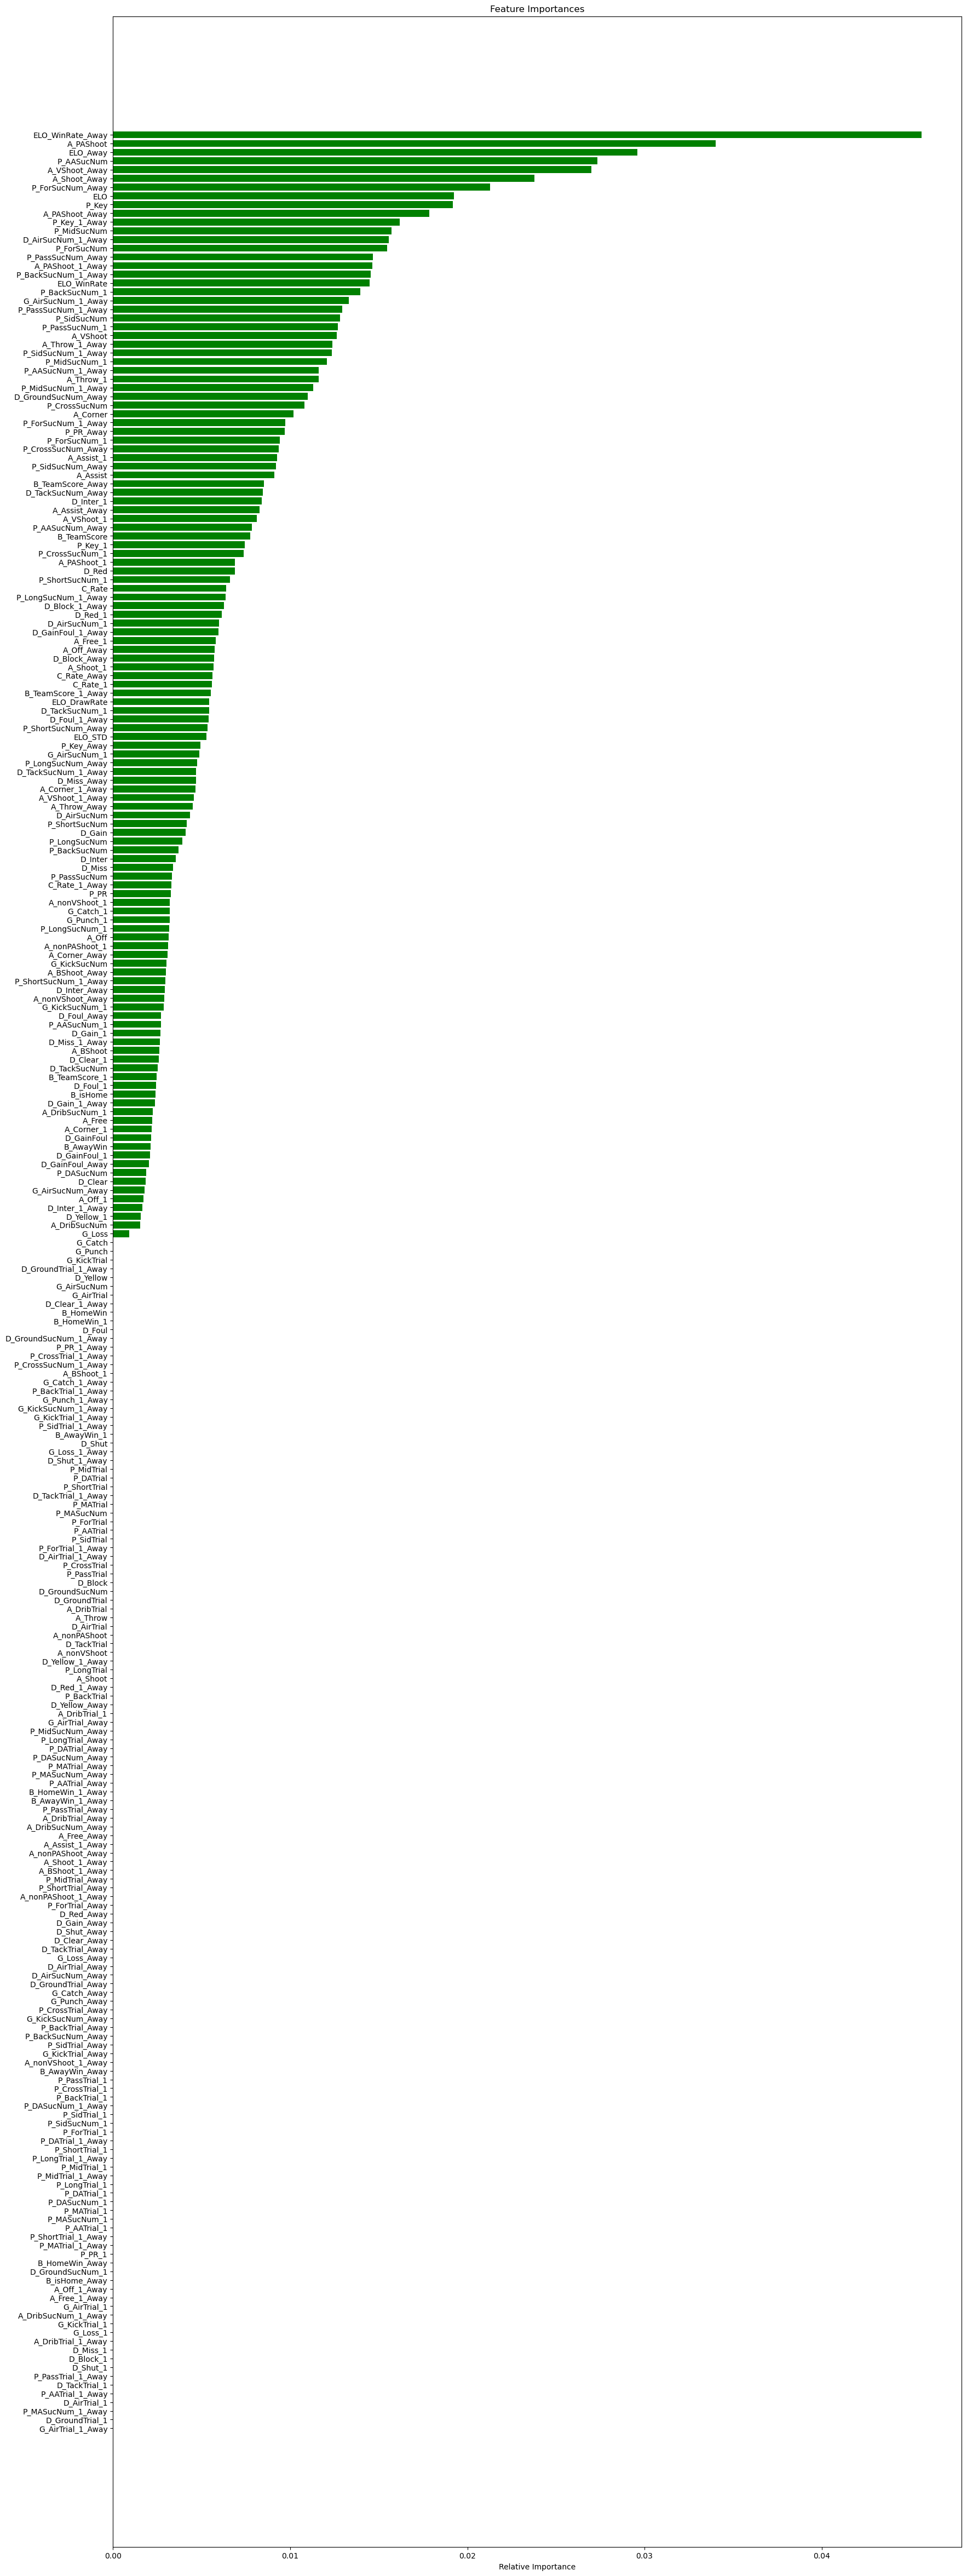

In [414]:
cls = RandomForestClassifier(max_depth=2, random_state=0)
cls.fit(X_train, y_train)

importances = cls.feature_importances_
indices = np.argsort(importances)
features = FSdata.columns
plt.figure(figsize=(20,60))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [377]:
for i in range(len(features)):
    if features[i] == 'G_Loss':
        print(i)

62


In [378]:
for i in range(len(importances)):
    if i==62:
        print(importances[i])

0.0009138804751309462


In [465]:
validx = list()
for i in range(len(importances)):
    feat = features.tolist()[:-1]
    impt = importances.tolist()[i]
    if impt >= importances[62]: # << G_Loss의 중요도 (마지노선)
        validx.append(i)

In [466]:
selected_features = list()
for i in validx:
    selected_features.append(features[i])

selected_features

['ELO',
 'ELO_WinRate',
 'ELO_DrawRate',
 'ELO_STD',
 'B_TeamScore',
 'B_isHome',
 'B_AwayWin',
 'C_Rate',
 'A_Assist',
 'A_VShoot',
 'A_BShoot',
 'A_PAShoot',
 'A_Off',
 'A_Free',
 'A_Corner',
 'A_DribSucNum',
 'P_PassSucNum',
 'P_Key',
 'P_AASucNum',
 'P_DASucNum',
 'P_LongSucNum',
 'P_MidSucNum',
 'P_ShortSucNum',
 'P_ForSucNum',
 'P_SidSucNum',
 'P_BackSucNum',
 'P_CrossSucNum',
 'P_PR',
 'D_AirSucNum',
 'D_TackSucNum',
 'D_Clear',
 'D_Inter',
 'D_Gain',
 'D_Miss',
 'D_GainFoul',
 'D_Red',
 'G_Loss',
 'G_KickSucNum',
 'B_TeamScore_1',
 'C_Rate_1',
 'A_Assist_1',
 'A_Shoot_1',
 'A_VShoot_1',
 'A_nonVShoot_1',
 'A_PAShoot_1',
 'A_nonPAShoot_1',
 'A_Off_1',
 'A_Free_1',
 'A_Corner_1',
 'A_Throw_1',
 'A_DribSucNum_1',
 'P_PassSucNum_1',
 'P_Key_1',
 'P_AASucNum_1',
 'P_LongSucNum_1',
 'P_MidSucNum_1',
 'P_ShortSucNum_1',
 'P_ForSucNum_1',
 'P_BackSucNum_1',
 'P_CrossSucNum_1',
 'D_AirSucNum_1',
 'D_TackSucNum_1',
 'D_Clear_1',
 'D_Inter_1',
 'D_Gain_1',
 'D_Foul_1',
 'D_GainFoul_1',
 '

In [417]:
len(selected_features)

127

In [418]:
selected_features

['ELO',
 'ELO_WinRate',
 'ELO_DrawRate',
 'ELO_STD',
 'B_TeamScore',
 'B_isHome',
 'B_AwayWin',
 'C_Rate',
 'A_Assist',
 'A_VShoot',
 'A_BShoot',
 'A_PAShoot',
 'A_Off',
 'A_Free',
 'A_Corner',
 'A_DribSucNum',
 'P_PassSucNum',
 'P_Key',
 'P_AASucNum',
 'P_DASucNum',
 'P_LongSucNum',
 'P_MidSucNum',
 'P_ShortSucNum',
 'P_ForSucNum',
 'P_SidSucNum',
 'P_BackSucNum',
 'P_CrossSucNum',
 'P_PR',
 'D_AirSucNum',
 'D_TackSucNum',
 'D_Clear',
 'D_Inter',
 'D_Gain',
 'D_Miss',
 'D_GainFoul',
 'D_Red',
 'G_Loss',
 'G_KickSucNum',
 'B_TeamScore_1',
 'C_Rate_1',
 'A_Assist_1',
 'A_Shoot_1',
 'A_VShoot_1',
 'A_nonVShoot_1',
 'A_PAShoot_1',
 'A_nonPAShoot_1',
 'A_Off_1',
 'A_Free_1',
 'A_Corner_1',
 'A_Throw_1',
 'A_DribSucNum_1',
 'P_PassSucNum_1',
 'P_Key_1',
 'P_AASucNum_1',
 'P_LongSucNum_1',
 'P_MidSucNum_1',
 'P_ShortSucNum_1',
 'P_ForSucNum_1',
 'P_BackSucNum_1',
 'P_CrossSucNum_1',
 'D_AirSucNum_1',
 'D_TackSucNum_1',
 'D_Clear_1',
 'D_Inter_1',
 'D_Gain_1',
 'D_Foul_1',
 'D_GainFoul_1',
 '

##### SHAP Summary Plot

In [200]:
!pip install shap
import shap

     -------------------------------------- 462.3/462.3 kB 4.1 MB/s eta 0:00:00


In [297]:
explainer = shap.TreeExplainer(cls)
shap_values = explainer.shap_values(X)

In [298]:
class_names = y.unique().tolist()

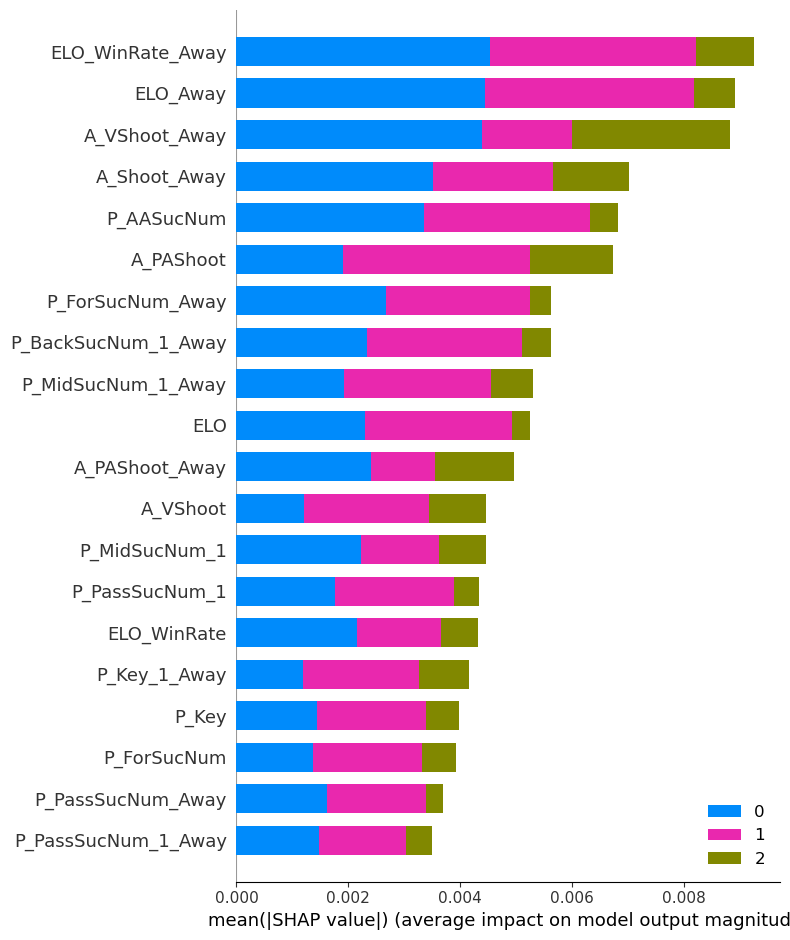

In [299]:
shap.summary_plot(shap_values, X.values, plot_type="bar", 
                  class_names= class_names, feature_names = X.columns)

##### Selection

In [383]:
selected_features

['ELO',
 'ELO_WinRate',
 'ELO_DrawRate',
 'ELO_STD',
 'B_TeamScore',
 'B_isHome',
 'B_AwayWin',
 'C_Rate',
 'A_Assist',
 'A_VShoot',
 'A_BShoot',
 'A_PAShoot',
 'A_Off',
 'A_Free',
 'A_Corner',
 'A_DribSucNum',
 'P_PassSucNum',
 'P_Key',
 'P_AASucNum',
 'P_DASucNum',
 'P_LongSucNum',
 'P_MidSucNum',
 'P_ShortSucNum',
 'P_ForSucNum',
 'P_SidSucNum',
 'P_BackSucNum',
 'P_CrossSucNum',
 'P_PR',
 'D_AirSucNum',
 'D_TackSucNum',
 'D_Clear',
 'D_Inter',
 'D_Gain',
 'D_Miss',
 'D_GainFoul',
 'D_Red',
 'G_Loss',
 'G_KickSucNum',
 'B_TeamScore_1',
 'C_Rate_1',
 'A_Assist_1',
 'A_Shoot_1',
 'A_VShoot_1',
 'A_nonVShoot_1',
 'A_PAShoot_1',
 'A_nonPAShoot_1',
 'A_Off_1',
 'A_Free_1',
 'A_Corner_1',
 'A_Throw_1',
 'A_DribSucNum_1',
 'P_PassSucNum_1',
 'P_Key_1',
 'P_AASucNum_1',
 'P_LongSucNum_1',
 'P_MidSucNum_1',
 'P_ShortSucNum_1',
 'P_ForSucNum_1',
 'P_BackSucNum_1',
 'P_CrossSucNum_1',
 'D_AirSucNum_1',
 'D_TackSucNum_1',
 'D_Clear_1',
 'D_Inter_1',
 'D_Gain_1',
 'D_Foul_1',
 'D_GainFoul_1',
 '

In [467]:
df = data.iloc[:,:5]
for idx in selected_features:
    df[idx] = data[idx]
df['Result'] = data['Result']
data = df

In [468]:
data = data[data.index%2==0]

### 3) 인덱스 점검

In [469]:
# 날짜 인덱스화
data.index = data['B_Date']
data.drop('B_Date', axis = 1, inplace = True)

In [470]:
dv = data['Result']

# 4. 모델링

### 1) Train/Test Split

In [471]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X = data.copy()
y = X.pop('Result')

scaled_data = scaler.fit_transform(X.select_dtypes(exclude=["object", "category"]))
df_scaled = pd.DataFrame(data=scaled_data, columns=X.select_dtypes(exclude=['object', 'category']).columns)
X = df_scaled.copy()

In [472]:
data.shape

(624, 132)

In [473]:
yearindex = len(data[data.index<'2023-01-01'])
X_train = X.iloc[:yearindex,:] # before 2023 / from 2023
y_train = y[:yearindex]
X_test = X.iloc[yearindex:, :]
y_test = y[yearindex:]

len(X_train)/len(data) # 분할비율은 8:2 정도

0.7884615384615384

### 2) ML Fitting

In [30]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
!pip install lightgbm
from lightgbm import LGBMClassifier



from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error, r2_score

In [402]:
# NB
NB = MultinomialNB().fit(X_train, y_train)
y_predicted = NB.predict(X_test)
print(' \n confusion_matrix (Naive Bayesian) \n ')
cm = confusion_matrix(y_test, y_predicted)
print(cm)
print('----------------')
print('\n Classification Report:')
print (classification_report(y_test, y_predicted))
print('=============================================================')

# DT
DT = tree.DecisionTreeClassifier().fit(X_train, y_train)
y_predicted= DT.predict(X_test)
print (' \n confusion_matrix (Decision Tree) \n ')
cm = confusion_matrix(y_test, y_predicted)
print (cm)
print('----------------')
print ('\n Classification Report:')
print (classification_report(y_test, y_predicted))
print('=============================================================')

# SGD
SGD = SGDClassifier(alpha=.0001).fit(X_train, y_train)
y_predicted = SGD.predict(X_test)
print (' \n confusion_matrix (SGD) \n ')
cm = confusion_matrix(y_test, y_predicted)
print (cm)
print('----------------')
print ('\n Classification Report:')
print (classification_report(y_test, y_predicted))
print('=============================================================')

# SVM
SVM = LinearSVC().fit(X_train, y_train)
y_predicted = SVM.predict(X_test)
print (' \n confusion_matrix (SVM)\n ')
cm = confusion_matrix(y_test, y_predicted)
print (cm)
print('----------------')
print ('\n Classification Report:')
print (classification_report(y_test, y_predicted))
print('=============================================================')

# RF
RFA = RandomForestClassifier(n_estimators=10)
RFA.fit(X_train, y_train)
y_predicted = RFA.predict(X_test)
print (' \n confusion_matrix (RandomForest) \n ')
cm = confusion_matrix(y_test, y_predicted)
print (cm)
print('----------------')
print ('\n Classification Report:')
print (classification_report(y_test, y_predicted))
print('=============================================================')

# LR
Logi = LogisticRegression(multi_class = 'multinomial')
Logi.fit(X_train, y_train)
y_predicted = Logi.predict(X_test)
print (' \n confusion_matrix (Logistic Regression) \n ')
cm = confusion_matrix(y_test, y_predicted)
print (cm)
print('----------------')
print ('\n Classification Report:')
print (classification_report(y_test, y_predicted))
print('=============================================================')

# adaBoost
model_cand = AdaBoostClassifier()
model_cand.fit(X_train, y_train)
y_predicted = model_cand.predict(X_test)
print (' \n confusion_matrix (AdaBoost) \n ')
cm = confusion_matrix(y_test, y_predicted)
print (cm)
print('----------------')
print ('\n Classification Report:')
print (classification_report(y_test, y_predicted))
print('=============================================================')

# GBM
model_cand = GradientBoostingClassifier()
model_cand.fit(X_train, y_train)
y_predicted = model_cand.predict(X_test)
print (' \n confusion_matrix (GBM) \n ')
cm = confusion_matrix(y_test, y_predicted)
print (cm)
print('----------------')
print ('\n Classification Report:')
print (classification_report(y_test, y_predicted))
print('=============================================================')

# LightGBM
model_cand = LGBMClassifier()
model_cand.fit(X_train, y_train)
y_predicted = model_cand.predict(X_test)
print (' \n confusion_matrix (LightGBM) \n ')
cm = confusion_matrix(y_test, y_predicted)
print (cm)
print('----------------')
print ('\n Classification Report:')
print (classification_report(y_test, y_predicted))
print('=============================================================')

# elasticnet
model_cand = LogisticRegression(penalty = 'elasticnet', solver = 'saga', l1_ratio = 0.5)
model_cand.fit(X_train, y_train)
y_predicted = model_cand.predict(X_test)
print (' \n confusion_matrix (ElasticNet) \n ')
cm = confusion_matrix(y_test, y_predicted)
print (cm)
print('----------------')
print ('\n Classification Report:')
print (classification_report(y_test, y_predicted))
print('=============================================================')

# KNN
model_cand = KNeighborsClassifier(n_neighbors = 10)
model_cand.fit(X_train, y_train)
y_predicted = model_cand.predict(X_test)
print (' \n confusion_matrix (KNN) \n ')
cm = confusion_matrix(y_test, y_predicted)
print (cm)
print('----------------')
print ('\n Classification Report:')
print (classification_report(y_test, y_predicted))
print('=============================================================')

y_train = y_train.astype(int)
y_test = y_test.astype(int)

# XGB
model_cand = XGBClassifier()
model_cand.fit(X_train, y_train)
y_predicted = model_cand.predict(X_test)
print (' \n confusion_matrix (XGB) \n ')
cm = confusion_matrix(y_test, y_predicted)
print (cm)
print('----------------')
print ('\n Classification Report:')
print (classification_report(y_test, y_predicted))
print('=============================================================')

 
 confusion_matrix (Naive Bayesian) 
 
[[ 9  7 19]
 [ 9  8 24]
 [ 8  7 35]]
----------------

 Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.26      0.30        35
           1       0.36      0.20      0.25        41
           2       0.45      0.70      0.55        50

    accuracy                           0.41       126
   macro avg       0.39      0.38      0.37       126
weighted avg       0.39      0.41      0.38       126

 
 confusion_matrix (Decision Tree) 
 
[[ 9 12 14]
 [13 12 16]
 [13 12 25]]
----------------

 Classification Report:
              precision    recall  f1-score   support

           0       0.26      0.26      0.26        35
           1       0.33      0.29      0.31        41
           2       0.45      0.50      0.48        50

    accuracy                           0.37       126
   macro avg       0.35      0.35      0.35       126
weighted avg       0.36      0.37      0.36       126

 

In [392]:
print('done')

done


In [407]:
a = 0.44+0.43+0.43+0.4
round(a/4,3)

0.425

# 테스트

In [474]:
# KNN
model_cand = KNeighborsClassifier(n_neighbors = 10)
model_cand.fit(X_train, y_train)
y_predicted = model_cand.predict(X_test)
print (' \n confusion_matrix (KNN) \n ')
cm = confusion_matrix(y_test, y_predicted)
print (cm)
print('----------------')
print ('\n Classification Report:')
print (classification_report(y_test, y_predicted))
print('=============================================================')

 
 confusion_matrix (KNN) 
 
[[17  7 11]
 [15 16 16]
 [ 8 17 25]]
----------------

 Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.49      0.45        35
           1       0.40      0.34      0.37        47
           2       0.48      0.50      0.49        50

    accuracy                           0.44       132
   macro avg       0.44      0.44      0.44       132
weighted avg       0.44      0.44      0.44       132



In [475]:
model_cand = LGBMClassifier()
model_cand.fit(X_train, y_train)
y_predicted = model_cand.predict(X_test)

In [476]:
p = y_predicted.tolist()

In [477]:
r = y[yearindex:].values.astype('int64').tolist()

In [478]:
day = data.index[data.index>'2023-01-01'].tolist()

In [479]:
hteam = data['B_Team'][yearindex:].values.tolist()

In [480]:
ateam = data['B_OppTeam'][yearindex:].values.tolist()

In [481]:
show = pd.DataFrame({'날짜':day, '홈 팀':hteam, '어웨이 팀':ateam, '예측':p, '실제':r})

In [482]:
show['예측'] = show['예측'].astype('int64')

In [435]:
show

,날짜,홈 팀,어웨이 팀,예측,실제
0,2023-04-22,서울,수원,1,2
1,2023-04-22,울산,포항,1,1
2,2023-04-22,대구,대전,2,2
3,2023-04-22,인천,수원FC,0,1
4,2023-04-23,광주,강원,2,1
...,...,...,...,...,...
121,2023-08-25,전북,대전,2,1
122,2023-08-26,대구,제주,0,2
123,2023-08-26,강원,포항,2,1
124,2023-08-27,서울,울산,2,1


In [483]:
for i in range(len(show)):
    presult = show.iloc[i,3]
    rresult = show.iloc[i,4]
    if presult==2:
        show.iloc[i,3] = '홈 승'
    elif presult==1:
        show.iloc[i,3] = '무승부'
    else:
        show.iloc[i,3] = '어웨이 승'
        
    if rresult==2:
        show.iloc[i,4] = '홈 승'
    elif rresult==1:
        show.iloc[i,4] = '무승부'
    else:
        show.iloc[i,4] = '어웨이 승'

In [437]:
show

,날짜,홈 팀,어웨이 팀,예측,실제
0,2023-04-22,서울,수원,무승부,홈 승
1,2023-04-22,울산,포항,무승부,무승부
2,2023-04-22,대구,대전,홈 승,홈 승
3,2023-04-22,인천,수원FC,어웨이 승,무승부
4,2023-04-23,광주,강원,홈 승,무승부
...,...,...,...,...,...
121,2023-08-25,전북,대전,홈 승,무승부
122,2023-08-26,대구,제주,어웨이 승,홈 승
123,2023-08-26,강원,포항,홈 승,무승부
124,2023-08-27,서울,울산,홈 승,무승부


In [438]:
show.tail(6)

,날짜,홈 팀,어웨이 팀,예측,실제
120,2023-08-25,수원FC,인천,홈 승,어웨이 승
121,2023-08-25,전북,대전,홈 승,무승부
122,2023-08-26,대구,제주,어웨이 승,홈 승
123,2023-08-26,강원,포항,홈 승,무승부
124,2023-08-27,서울,울산,홈 승,무승부
125,2023-08-27,광주,수원,홈 승,홈 승


In [147]:
print('Done')

Done


In [484]:
show.to_csv('2023시즌_예측결과3.csv', header = True, index = False, encoding = 'cp949')

### 3) DL Fitting

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X = data.copy()
y = X.pop('Goals')

scaled_data = scaler.fit_transform(X.select_dtypes(exclude=["object", "category"]))
df_scaled = pd.DataFrame(data=scaled_data, columns=X.select_dtypes(exclude=['object', 'category']).columns)
X = df_scaled.copy()

X_train = X.iloc[:yearindex, :] #before 2023, after2023
y_train = y[:yearindex]
X_test = X.iloc[yearindex:, :]
y_test = y[yearindex:]
X_train = X_train.values.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.values.reshape((X_test.shape[0],X_test.shape[1],1))
y_train = y_train.values.reshape((y_train.shape[0], 1))
y_test = y_test.values.reshape((y_test.shape[0], 1))
y_train = y_train.astype('int')
y_test = y_test.astype('int')
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

In [160]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, GRU, LSTM, Conv2D
from keras.optimizers import SGD

import tensorflow as tf

In [ ]:
### cnn
cnn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,1), padding='same', activation='relu', input_shape=(X_train.shape[1],1,1)),
    tf.keras.layers.MaxPooling2D((2,1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1,activation='linear') # 회귀니까
])
cnn.compile(optimizer='adam', metrics=['mae'],loss='mse')
cnn.fit(X_train, y_train, epochs=20, verbose = 0)
y_pred_cnn = cnn.predict(X_test)

In [ ]:
lstm = Sequential()   # 레이어를 선형으로 연결하여 구성
lstm.add(LSTM(
    units = 32,
    return_sequences = True,
    input_shape = (X_train.shape[1], 1),
    activation = 'tanh'
))
lstm.add(LSTM(units = 5, activation = 'tanh')) # 두 번째 이후 레이어들은 자동으로 형태를 추정할 수 있기에 형태 정보 X
lstm.add(Dense(units=1, activation = 'linear')) # 입력 뉴런과 출력 뉴런을 연결하는 전결합층
lstm.compile(optimizer = SGD(lr = 0.01, decay = 1e-7,
                             momentum = 0.9, nesterov = False),
             loss = 'mean_squared_error')
lstm.fit(X_train, y_train, epochs = 20, verbose = 1) # 에폭스 50이면 whole data를 50번 학습
y_pred_lstm = lstm.predict(X_test)

In [ ]:
### GRU
gru = Sequential()   # 레이어를 선형으로 연결하여 구성
gru.add(GRU(
    units = 50,
    return_sequences = True,
    input_shape = (X_train.shape[1], 1),
    activation = 'tanh'
))
gru.add(GRU(units = 5, activation = 'tanh')) # 두 번째 이후 레이어들은 자동으로 형태를 추정할 수 있기에 형태 정보 X
gru.add(Dense(units=1, activation = 'linear')) # 입력 뉴런과 출력 뉴런을 연결하는 전결합층
gru.compile(optimizer = SGD(lr = 0.01, decay = 1e-7,
                            momentum = 0.9, nesterov = False),
            loss = 'mean_squared_error')

gru.fit(X_train, y_train, epochs = 50, verbose = 0)
y_pred_gru = gru.predict(X_test)

In [ ]:
### RNN
rnn = Sequential() 
rnn.add(SimpleRNN(
    units = 32,
    return_sequences = True,
    input_shape = (X_train.shape[1], 1),
    activation = 'tanh'
))
rnn.add(SimpleRNN(units = 5, activation = 'tanh'))
rnn.add(Dense(units=1, activation = 'linear'))
rnn.compile(optimizer = SGD(lr = 0.01, decay = 1e-7,
                            momentum = 0.9, nesterov = False),
            loss = 'mean_squared_error')
rnn.fit(X_train, y_train, epochs = 50, verbose = 1)
y_pred_rnn = rnn.predict(X_test)

In [ ]:
print('CNN')
print (classification_report(y_test, y_pred_cnn))
print('----------------------------------------------')
print('LSTM')
print (classification_report(y_test, y_pred_lstm))
print('----------------------------------------------')
print('GRU')
print (classification_report(y_test, y_pred_gru))
print('----------------------------------------------')
print('RNN')
print (classification_report(y_test, y_pred_rnn))
print('----------------------------------------------')